In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [ ]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [ ]:
df = df.drop("Product", axis=1)

In [ ]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

In [ ]:
df.head()


,laptop_ID,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,1,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,False,False,False,False,False,False,False,False,False,False
1,2,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,False,False,False,False,False,False,False,False,False,False
2,3,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,False,False,False,False,False,False,False,False,False,False
3,4,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,False,False,False,False,False,False,False,False,False,False
4,5,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [ ]:
df = df.drop("ScreenResolution", axis=1)

In [ ]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [ ]:
df = df.drop("Cpu", axis=1)

In [ ]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [ ]:
df["Ram"] = df["Ram"].str[:-2]

In [ ]:
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [ ]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [ ]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [ ]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [ ]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [ ]:
df = df.drop("Memory", axis=1)

In [ ]:
df["Weight"] = df["Weight"].str[:-2]

In [ ]:
df["Weight"] = df["Weight"].astype("float")

In [ ]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [ ]:
df = df.drop("Gpu", axis=1)

In [ ]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [ ]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [ ]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

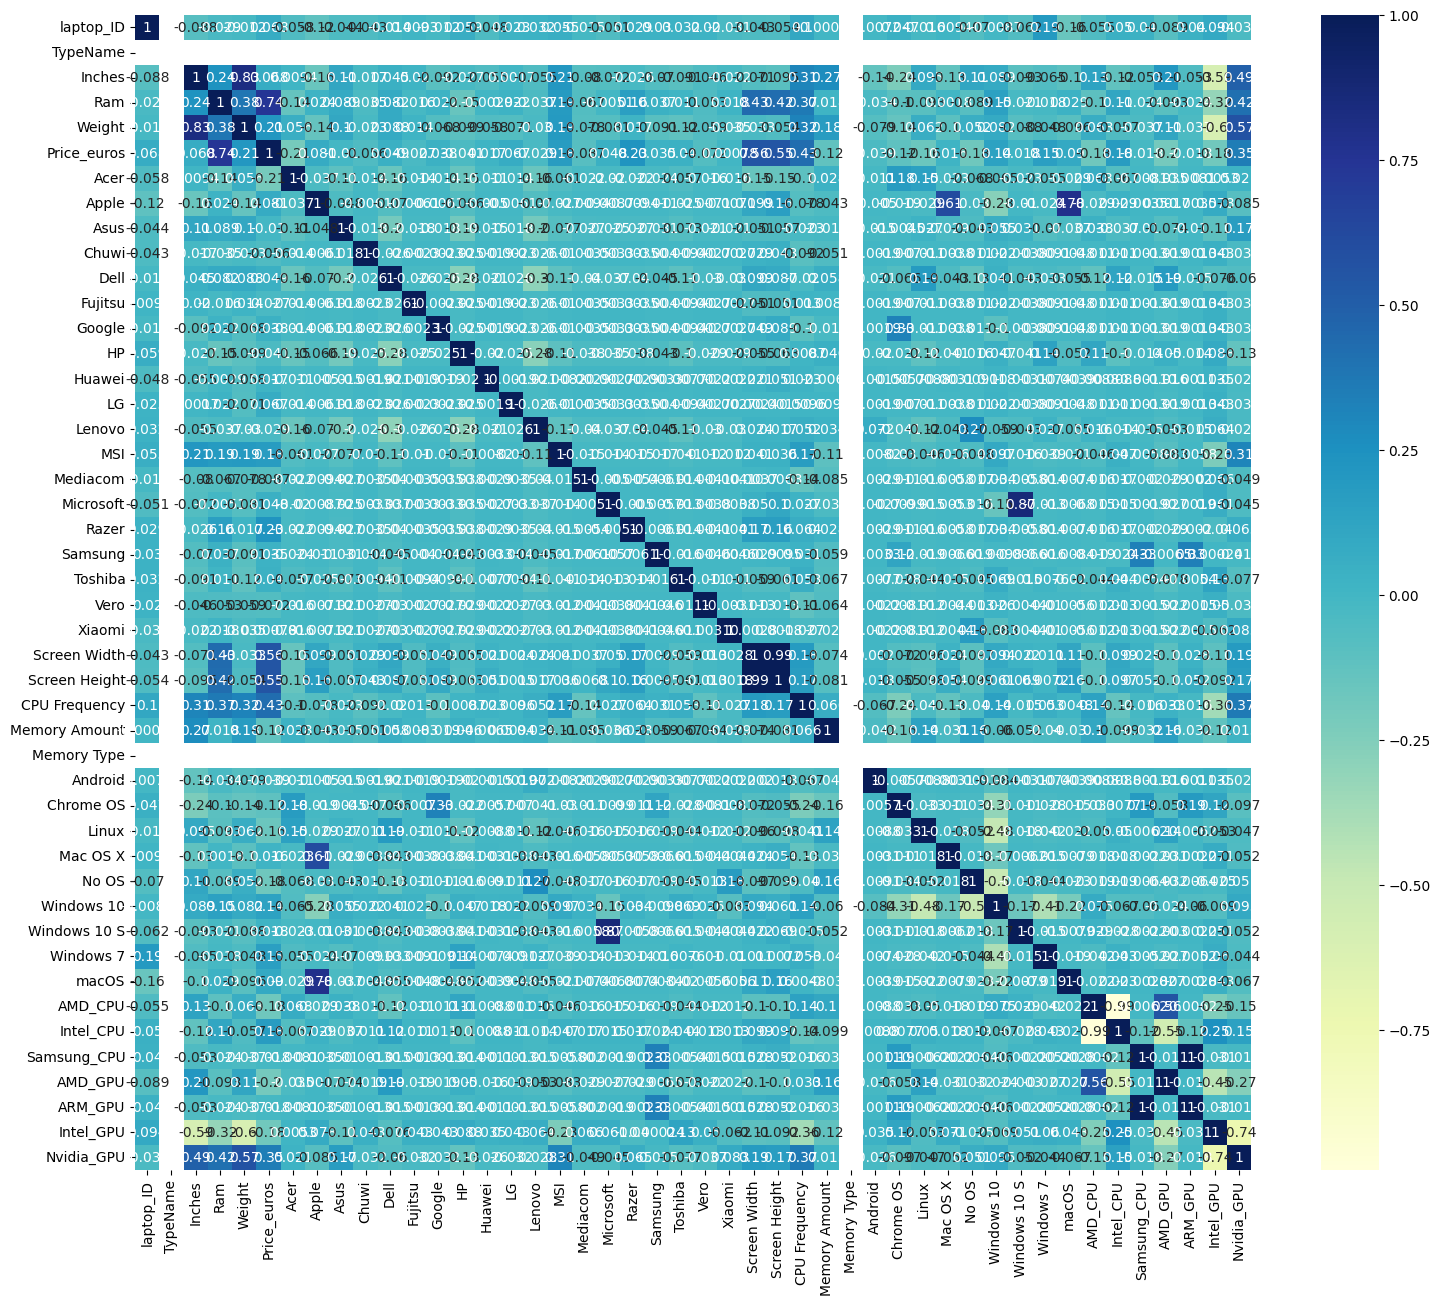

In [ ]:
# Convert columns to numeric where possible, errors='coerce' will convert invalid values to NaN
import matplotlib.pyplot as plt
import seaborn as sns # import the seaborn library and alias it as 'sns'
df = df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

In [ ]:
target_correlations

,Price_euros
Xiaomi,0.000776
Asus,0.010376
Mac OS X,0.015656
Huawei,0.016851
Windows 10 S,0.018312
ARM_GPU,0.018431
Samsung_CPU,0.018431
Fujitsu,0.027135
Lenovo,0.029007
Samsung,0.034584


In [ ]:
selected_features = target_correlations[-21:].index

In [ ]:
selected_features = list(selected_features)

In [ ]:
selected_features

['Memory Amount',
 'Windows 10',
 'Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Nvidia_GPU',
 'CPU Frequency',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros',
 'TypeName',
 'Memory Type']

In [ ]:
limited_df = df[selected_features]

In [ ]:
limited_df

,Memory Amount,Windows 10,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,...,Weight,Razer,Nvidia_GPU,CPU Frequency,Screen Height,Screen Width,Ram,Price_euros,TypeName,Memory Type
0,128000.0,False,False,False,False,False,False,True,True,False,...,1.37,False,False,2.3,1600,2560,8,1339.69,NaN,NaN
1,128000.0,False,False,False,False,False,False,True,True,False,...,1.34,False,False,1.8,900,1440,8,898.94,NaN,NaN
2,256000.0,False,False,False,True,False,False,True,True,False,...,1.86,False,False,2.5,1080,1920,8,575.00,NaN,NaN
3,512000.0,False,False,False,False,False,False,True,False,True,...,1.83,False,False,2.7,1800,2880,16,2537.45,NaN,NaN
4,256000.0,False,False,False,False,False,False,True,True,False,...,1.37,False,False,3.1,1600,2560,8,1803.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,128000.0,True,False,False,False,False,False,True,True,False,...,1.80,False,False,2.5,1080,1920,4,638.00,NaN,NaN
1299,512000.0,True,False,False,False,False,False,True,True,False,...,1.30,False,False,2.5,1800,3200,16,1499.00,NaN,NaN
1300,64000.0,True,False,False,False,False,False,True,True,False,...,1.50,False,False,1.6,768,1366,2,229.00,NaN,NaN
1301,1000000.0,True,False,False,False,False,False,True,False,True,...,2.19,False,False,2.5,768,1366,6,764.00,NaN,NaN


<Axes: >

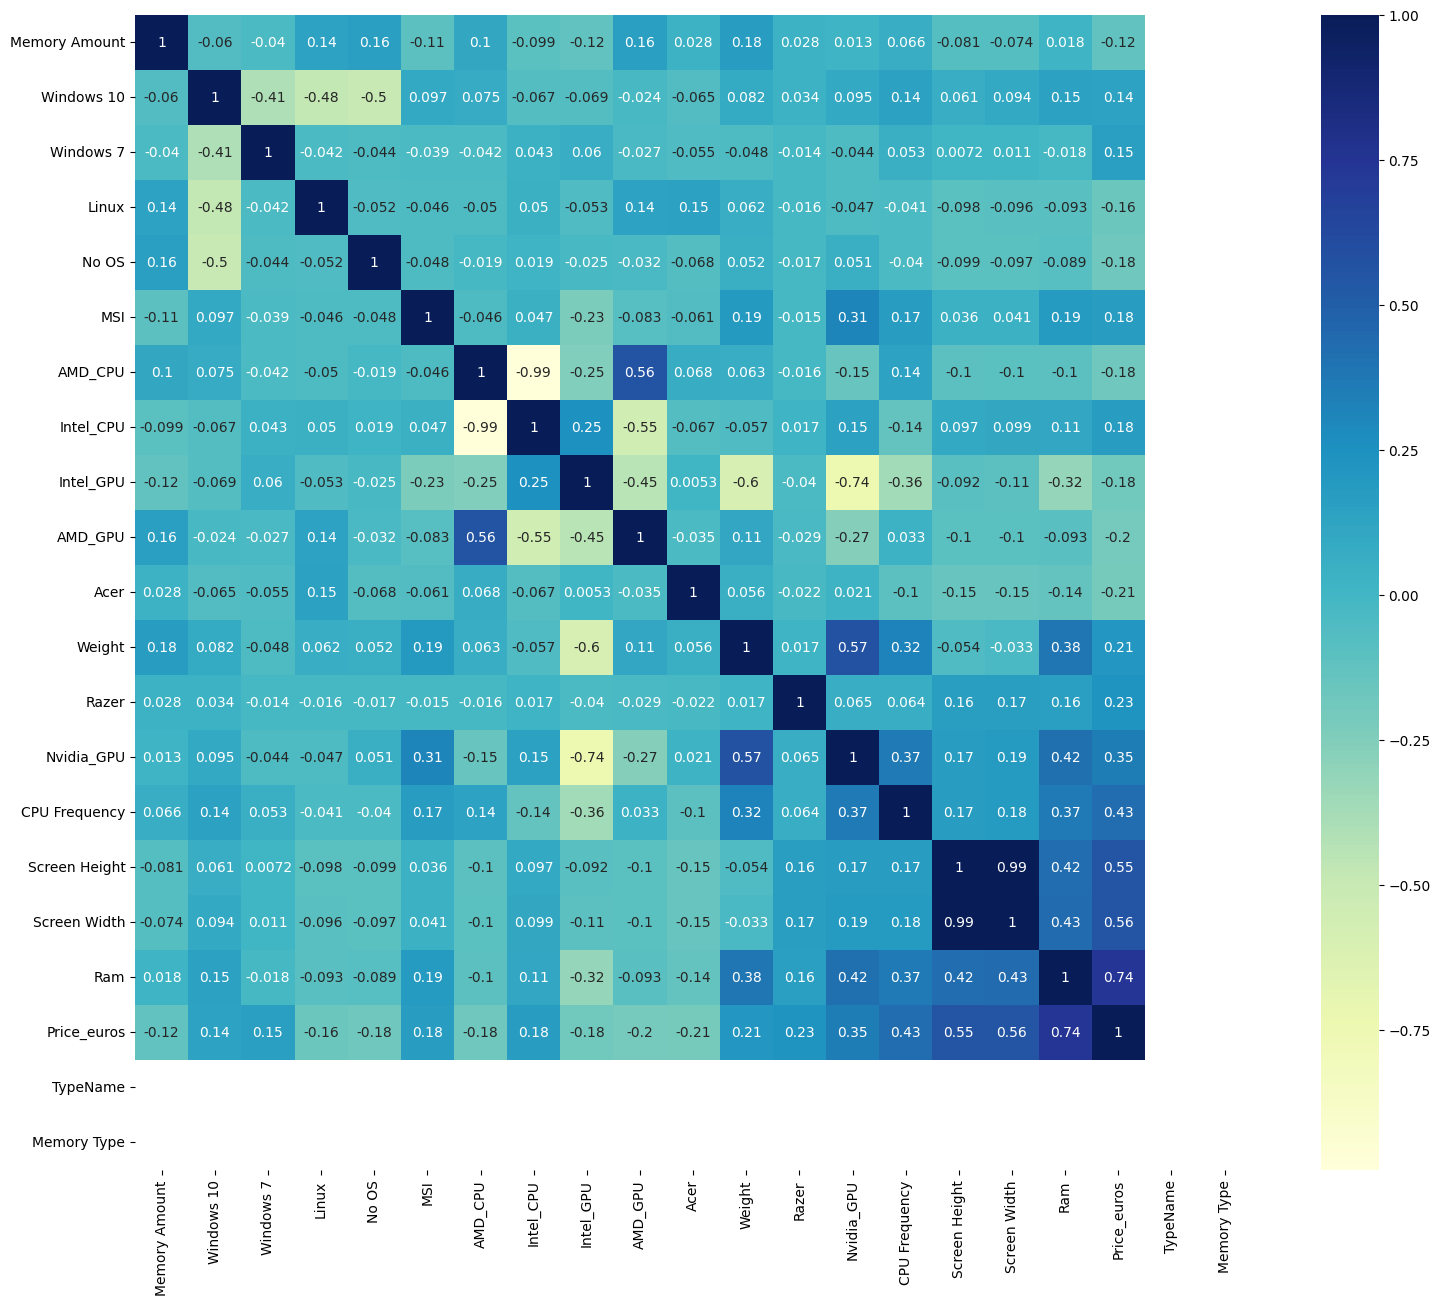

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
#model build random forest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Use a model that handles NaN values natively
#HistGradientBoostingRegressor model. This model is a type of machine learning algorithm that is used to make predictions based on dat
forest = HistGradientBoostingRegressor()

# Fit the model = training
forest.fit(X_train_scaled, y_train)




HistGradientBoostingRegressor()

In [ ]:
# Check the shapes of X_train_scaled and X_test_scaled
print(X_train_scaled.shape)  # Shape of training data (n_samples, n_features)
print(X_test_scaled.shape)   # Shape of test data

# If X_test_scaled has extra features, slice it to match X_train_scaled's shape
X_test_scaled = X_test_scaled[:, :X_train_scaled.shape[1]]

# Now, try scoring the model
score = forest.score(X_test_scaled, y_test)
print(score)


(1107, 20)
(196, 20)
0.7967453687815377


In [ ]:
y_pred = forest.predict(X_test_scaled)




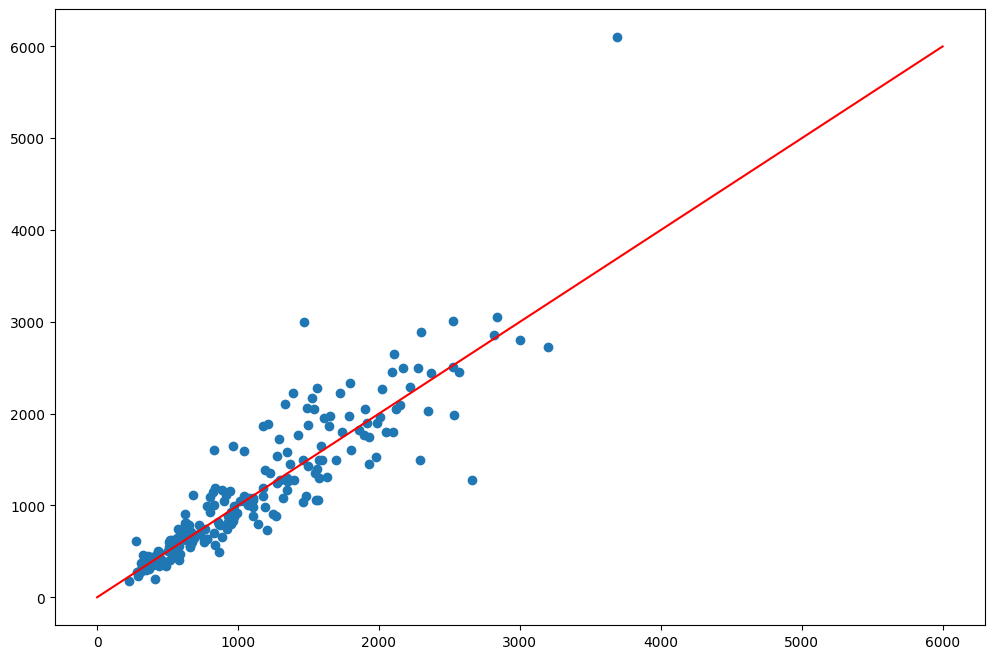

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [ ]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


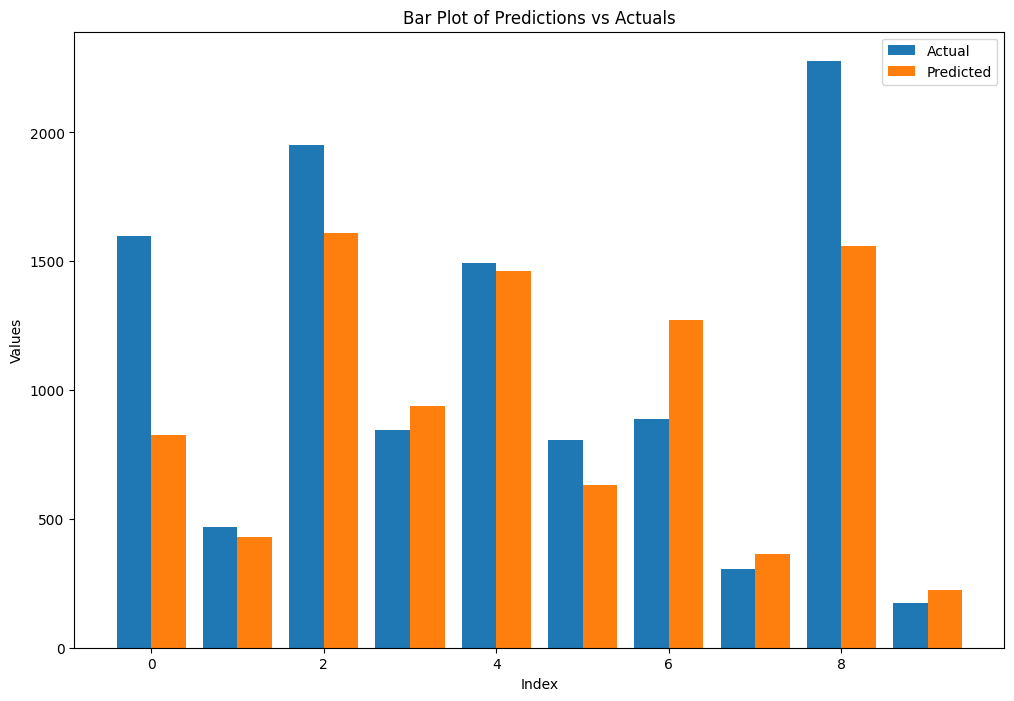

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Bar plot of y_pred vs y_test
indices = np.arange(10)  # Use the first 10 data points as an example
plt.figure(figsize=(12, 8))
plt.bar(indices - 0.2, y_test[:10], width=0.4, label='Actual')
plt.bar(indices + 0.2, y_pred[:10], width=0.4, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Bar Plot of Predictions vs Actuals')
plt.legend()
plt.show()


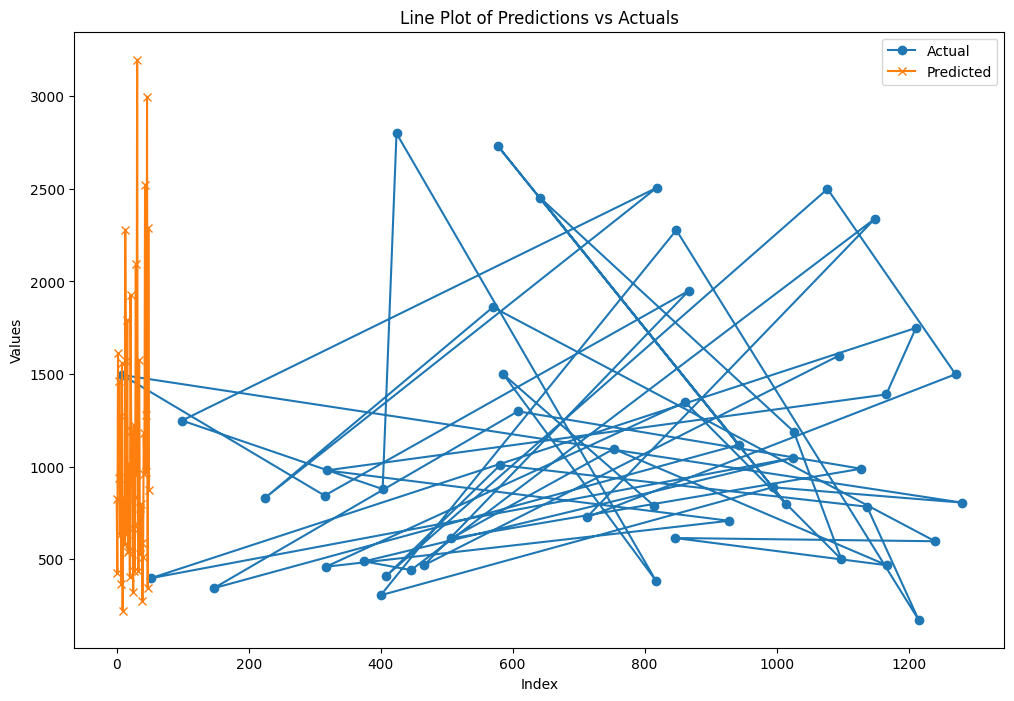

In [ ]:
# Line plot of y_pred vs y_test
plt.figure(figsize=(12, 8))
plt.plot(y_test[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Predictions vs Actuals')
plt.legend()
plt.show()


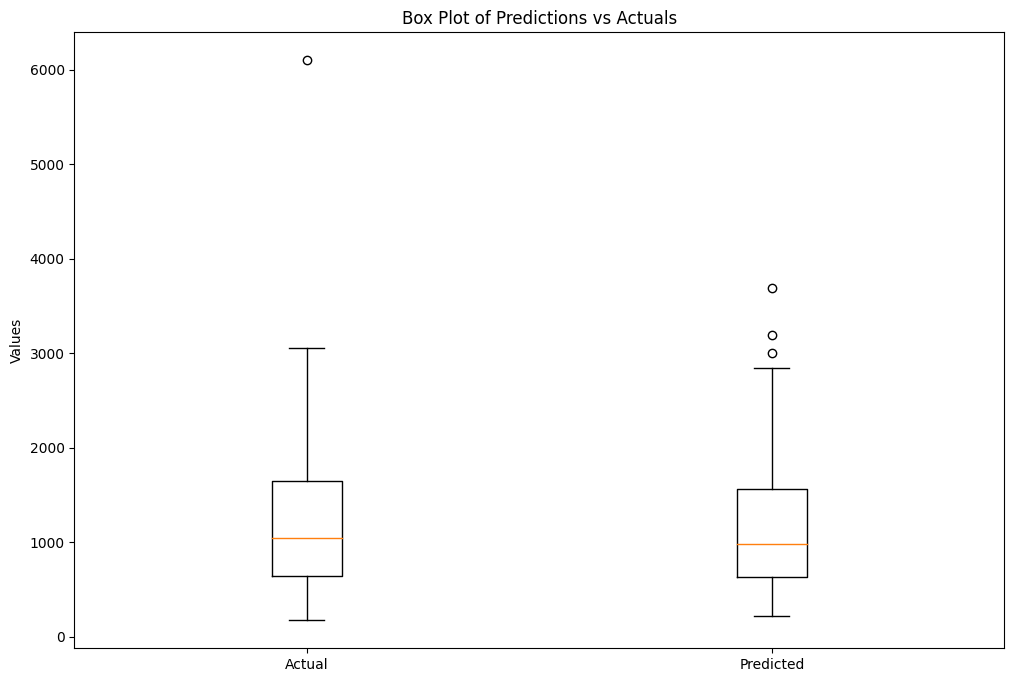

In [ ]:
# Box plot of y_pred vs y_test
plt.figure(figsize=(12, 8))
plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
plt.ylabel('Values')
plt.title('Box Plot of Predictions vs Actuals')
plt.show()


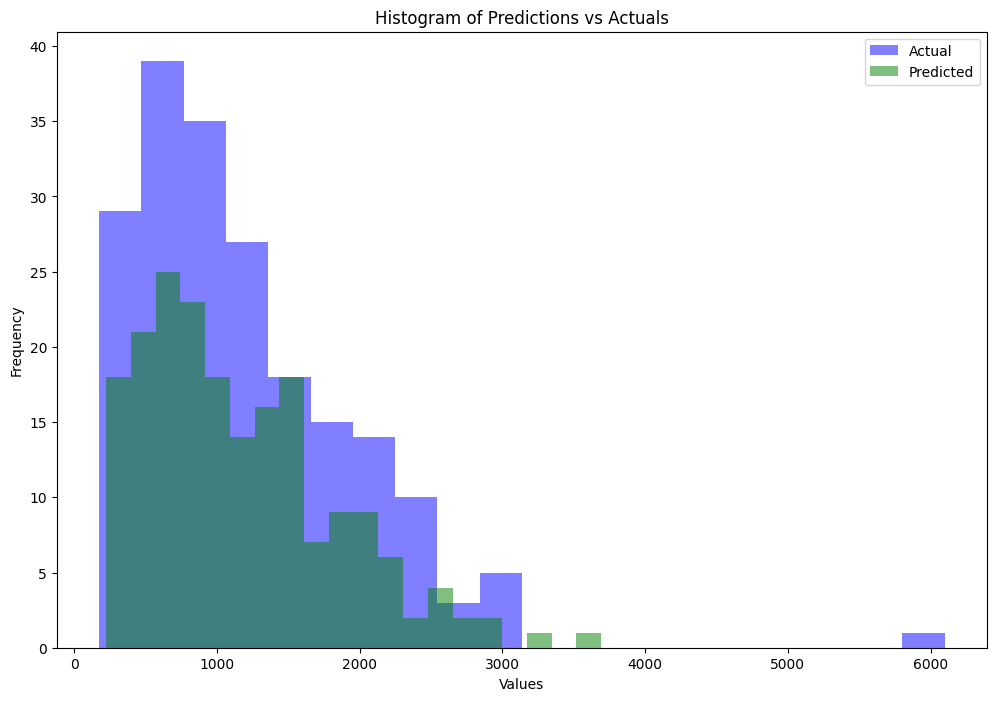

In [ ]:
# Histogram of y_pred vs y_test
plt.figure(figsize=(12, 8))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicted', color='green')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions vs Actuals')
plt.legend()
plt.show()


In [ ]:
# Check how many features the model was trained on
expected_features = forest.n_features_in_

# Ensure that X_new_scaled has the same number of features
if X_new_scaled.shape[1] != expected_features:
    # Investigate why X_new_scaled has the wrong number of features
    print(f"Error: X_new_scaled has {X_new_scaled.shape[1]} features, expected {expected_features}.")
    # You can add code to regenerate X_new_scaled if needed
    # ... (Code to regenerate X_new_scaled) ...
else:
    # If the number of features is correct, make predictions
    y_new_pred = forest.predict(X_new_scaled)
    print(y_new_pred)


[827.01143438]


In [ ]:
# Check the shape of X_train_scaled and X_new_scaled
print("Training data shape:", X_train_scaled.shape)
print("New data shape:", X_new_scaled.shape)


Training data shape: (1107, 20)
New data shape: (1, 20)


In [ ]:
y_test.iloc[0]

1599.0

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_test_pred = forest.predict(X_test_scaled)

# Calculate metrics
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print results
print(f"R² Score: {r2}")  #Accuracy=R2×100=0.853×100=85.3%
print(f"Mean Absolute Error (MAE): {mae}")  #measures the average absolute difference between predicted and actual values.
print(f"Mean Squared Error (MSE): {mse}")  # calculates the average squared differences, penalizing larger errors more.
print(f"Root Mean Squared Error (RMSE): {rmse}")  #is the square root of MSE, providing an error metric in the same units as the target variable.


R² Score: 0.7967453687815377
Mean Absolute Error (MAE): 214.43725723469333
Mean Squared Error (MSE): 121711.60823837102
Root Mean Squared Error (RMSE): 348.87190806708844
